In [ ]:
!pip install ydata-profiling
!pip install --upgrade Pillow

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os as os

Read dataset

In [ ]:
df = pd.read_csv("CARES_data_cleaned.csv")
df

,Indexno,Age,Gender,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,Anemiacategorybinned_Moderate/Severe,Anemiacategorybinned_NA,RDW15.7_<= 15.7,RDW15.7_>15.7,RDW15.7_NA,ASAcategorybinned_I,ASAcategorybinned_II,ASAcategorybinned_III,ASAcategorybinned_IV-VI,ASAcategorybinned_NA
0,2,48.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,True,False,False,False,False
1,5,36.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,True,False,False,True,False,False,False,False
2,6,64.0,Female,NaN,Mild,152.538570,G1,NaN,False,0.0,...,False,False,True,False,False,True,False,False,False,False
3,9,73.0,Male,NaN,Moderate,117.231496,G1,NaN,False,0.0,...,True,False,True,False,False,True,False,False,False,False
4,10,73.0,Male,0.0,Mild,98.651255,G1,59.0,False,0.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,121192,66.0,Female,2.0,Mild,48.339582,G3a,NaN,False,0.0,...,False,False,True,False,False,False,True,False,False,False
90781,121194,50.0,Male,1.0,Moderate,126.592489,G1,NaN,False,0.0,...,True,False,True,False,False,False,False,False,False,True
90782,121197,58.0,Female,NaN,NaN,86.306771,G2,NaN,False,0.0,...,False,True,True,False,False,False,False,False,False,True
90783,121198,63.0,Female,0.0,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,False,True,False,False,False


In [ ]:
df.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,63361.000000,79955.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.634789,33.954241,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,79.078715,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,1.000000,114.310169,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


In [ ]:
# Check number of missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Indexno                        0
Age                            0
Gender                         0
RCRI score                 27424
Anemia category            66916
                           ...  
ASAcategorybinned_I            0
ASAcategorybinned_II           0
ASAcategorybinned_III          0
ASAcategorybinned_IV-VI        0
ASAcategorybinned_NA           0
Length: 94, dtype: int64


In [ ]:
# Convert the result to a DataFrame for better visualization
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

display(missing_values_df)

,Column,Missing Values
0,Indexno,0
1,Age,0
2,Gender,0
3,RCRI score,27424
4,Anemia category,66916
...,...,...
89,ASAcategorybinned_I,0
90,ASAcategorybinned_II,0
91,ASAcategorybinned_III,0
92,ASAcategorybinned_IV-VI,0


In [ ]:
# Convert the result to a DataFrame for better visualization
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Export to Excel
missing_values_df.to_excel('missing_values.xlsx', index=False)

Remove columns that have been one-hot encoded, to prevent multicollinearity issues

In [ ]:
df.drop(['Gender', 'Anemia category', 'GradeofKidneydisease', 'AnaestypeCategory', 'PriorityCategory',
        'TransfusionIntraandpostopCategory', 'AGEcategory', 'AGEcategoryOriginal', 'SurgRiskCategory',
       'RaceCategory', 'GradeofKidneyCategory', 'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned'],
       axis=1, inplace = True)

In [ ]:
df.head()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,...,Anemiacategorybinned_Moderate/Severe,Anemiacategorybinned_NA,RDW15.7_<= 15.7,RDW15.7_>15.7,RDW15.7_NA,ASAcategorybinned_I,ASAcategorybinned_II,ASAcategorybinned_III,ASAcategorybinned_IV-VI,ASAcategorybinned_NA
0,2,48.0,NaN,NaN,NaN,False,0.0,0.0,0.0,0.0,...,False,True,False,False,True,True,False,False,False,False
1,5,36.0,NaN,NaN,NaN,False,0.0,0.0,0.0,0.0,...,False,True,True,False,False,True,False,False,False,False
2,6,64.0,NaN,152.538570,NaN,False,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,9,73.0,NaN,117.231496,NaN,False,0.0,1.0,0.0,1.0,...,True,False,True,False,False,True,False,False,False,False
4,10,73.0,0.0,98.651255,59.0,False,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
# Read original dataset first
df = pd.read_csv("CARES_data_cleaned.csv")
df

,Indexno,Age,Gender,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,Anemiacategorybinned_Moderate/Severe,Anemiacategorybinned_NA,RDW15.7_<= 15.7,RDW15.7_>15.7,RDW15.7_NA,ASAcategorybinned_I,ASAcategorybinned_II,ASAcategorybinned_III,ASAcategorybinned_IV-VI,ASAcategorybinned_NA
0,2,48.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,True,False,False,False,False
1,5,36.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,True,False,False,True,False,False,False,False
2,6,64.0,Female,NaN,Mild,152.538570,G1,NaN,False,0.0,...,False,False,True,False,False,True,False,False,False,False
3,9,73.0,Male,NaN,Moderate,117.231496,G1,NaN,False,0.0,...,True,False,True,False,False,True,False,False,False,False
4,10,73.0,Male,0.0,Mild,98.651255,G1,59.0,False,0.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,121192,66.0,Female,2.0,Mild,48.339582,G3a,NaN,False,0.0,...,False,False,True,False,False,False,True,False,False,False
90781,121194,50.0,Male,1.0,Moderate,126.592489,G1,NaN,False,0.0,...,True,False,True,False,False,False,False,False,False,True
90782,121197,58.0,Female,NaN,NaN,86.306771,G2,NaN,False,0.0,...,False,True,True,False,False,False,False,False,False,True
90783,121198,63.0,Female,0.0,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,False,True,False,False,False


In [ ]:
df.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,63361.000000,79955.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.634789,33.954241,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,79.078715,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,1.000000,114.310169,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


In [ ]:
df_mean = df.copy()

df_mean['RCRI score'].fillna(df_mean['RCRI score'].mean(), inplace = True)
df_mean['PreopEGFRMDRD'].fillna(df_mean['PreopEGFRMDRD'].mean(), inplace = True)

In [ ]:
#Check that there are no more missing values in these two columns:
print(df_mean['RCRI score'].isna().sum())
print(df_mean['PreopEGFRMDRD'].isna().sum())

0
0


In [ ]:
df_mean.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.530313,31.864673,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,81.773853,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.426155,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.322296,111.439680,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


In [ ]:
df_median = df.copy()

median_RCRI = df_median['RCRI score'].median()
df_median['RCRI score'].fillna(median_RCRI, inplace = True)

median_PreopEGFRMDRD = df_median['PreopEGFRMDRD'].median()
df_median['PreopEGFRMDRD'].fillna(median_PreopEGFRMDRD, inplace = True)

In [ ]:
df_median.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.224938,96.422863,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.550574,31.864675,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,81.773853,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.000000,111.439680,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


The mean of the **RCRI score** decreased (from 0.322 to 0.225) after replacing missing values in the **RCRI score** column with the median.

In [ ]:
#Check that there are no more missing values in these two columns:
print(df['RCRI score'].isna().sum())
print(df['PreopEGFRMDRD'].isna().sum())

df_interpolation = df.copy()

27424
10830


In [ ]:
# Interpolation imputation for RCRI score and PreopEGFRMDRD
df_interpolation['RCRI score'].interpolate(method='linear', inplace=True)
df_interpolation['PreopEGFRMDRD'].interpolate(method='linear', inplace=True)

# Forward fill to handle missing values at the start
df_interpolation['RCRI score'].fillna(method='ffill', inplace=True)
df_interpolation['PreopEGFRMDRD'].fillna(method='ffill', inplace=True)

# Backward fill to handle missing values at the end
df_interpolation['RCRI score'].fillna(method='bfill', inplace=True)
df_interpolation['PreopEGFRMDRD'].fillna(method='bfill', inplace=True)


<ipython-input-54-bfcb17434057>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolation['RCRI score'].fillna(method='ffill', inplace=True)
<ipython-input-54-bfcb17434057>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolation['PreopEGFRMDRD'].fillna(method='ffill', inplace=True)
<ipython-input-54-bfcb17434057>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolation['RCRI score'].fillna(method='bfill', inplace=True)
<ipython-input-54-bfcb17434057>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolation['PreopEGFRMDRD'].fillna(method='bfill', inplace=True)


In [ ]:
#Check that there are no more missing values in these two columns:
print(df_interpolation['RCRI score'].isna().sum())
print(df_interpolation['PreopEGFRMDRD'].isna().sum())

0
0


In [ ]:
df_interpolation.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.315999,97.787768,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.587262,33.144519,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,80.655950,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,98.016577,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.500000,115.528070,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


# Interpolation imputation with Backward fill to handle missing values at the end and Forward fill imputations to handle missing values at the start

The mean of the **RCRI score** almost remained the same from 0.322 to 0.316

The mean of the **PreopEGFRMDRD** slightly increased from 96.426 to 97.788

In [ ]:
df_mice = df.copy()

#Check that there are no more missing values in these two columns:
print(df_mice['RCRI score'].isna().sum())
print(df_mice['PreopEGFRMDRD'].isna().sum())

27424
10830


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
# Using MICE for imputation
mice_imputer = IterativeImputer()
df_imputed = df_mice.copy()
imputed_data = mice_imputer.fit_transform(df_mice[['RCRI score', 'PreopEGFRMDRD']])

# Replace NaN values with computed values
df_mice['RCRI score'] = imputed_data[:, 0]
df_mice['PreopEGFRMDRD'] = imputed_data[:, 1]

In [ ]:
#Check that there are no more missing values in these two columns:
print(df_mice['RCRI score'].isna().sum())
print(df_mice['PreopEGFRMDRD'].isna().sum())

0
0


In [ ]:
df_mice.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.321472,96.703195,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.541184,31.970736,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,-1.994679,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,81.704788,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.703195,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.410212,111.439680,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


# Mice imputation

The mean of the **RCRI score** almost remained the same from 0.322 to 0.321

The mean of the **PreopEGFRMDRD** almost remained the same from 96.426 to 96.703

In [ ]:
df_regression = df.copy()

#Check that there are no more missing values in these two columns:
print(df_regression['RCRI score'].isna().sum())
print(df_regression['PreopEGFRMDRD'].isna().sum())

27424
10830


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.impute import SimpleImputer


# Step 1: Impute missing values in PreopEGFRMDRD using mean
imputer = SimpleImputer(strategy='mean')
df_regression['PreopEGFRMDRD'] = imputer.fit_transform(df_regression[['PreopEGFRMDRD']])

# Step 2: Regression imputation for RCRI score
regressor_rcri = LinearRegression()
non_na_data_rcri = df_regression.dropna(subset=['RCRI score', 'PreopEGFRMDRD'])
regressor_rcri.fit(non_na_data_rcri[['PreopEGFRMDRD']], non_na_data_rcri['RCRI score'])

missing_rcri = df_regression[df_regression['RCRI score'].isna()]
if not missing_rcri.empty:
    df_regression.loc[df_regression['RCRI score'].isna(), 'RCRI score'] = regressor_rcri.predict(missing_rcri[['PreopEGFRMDRD']])

# Check if there are still missing values in PreopEGFRMDRD after mean imputation
if df_regression['PreopEGFRMDRD'].isna().sum() > 0:
    # Regression imputation for PreopEGFRMDRD
    regressor_preop = LinearRegression()
    non_na_data_preop = df_regression.dropna(subset=['PreopEGFRMDRD', 'RCRI score'])
    regressor_preop.fit(non_na_data_preop[['RCRI score']], non_na_data_preop['PreopEGFRMDRD'])

    missing_preop = df_regression[df_regression['PreopEGFRMDRD'].isna()]
    if not missing_preop.empty:
        df_regression.loc[df_regression['PreopEGFRMDRD'].isna(), 'PreopEGFRMDRD'] = regressor_preop.predict(missing_preop[['RCRI score']])


In [ ]:
#Check that there are no more missing values in these two columns:
print(df_regression['RCRI score'].isna().sum())
print(df_regression['PreopEGFRMDRD'].isna().sum())

0
0


In [ ]:
df_regression.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.320926,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.539922,31.864673,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,-1.856552,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,81.773853,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.426155,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.402673,111.439680,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


# Regression Imputation

The mean of the **RCRI score** slightly decreased from 0.322 to 0.321

The mean of the **PreopEGFRMDRD** remained the same from 96.426 to 96.426

In [ ]:
df_rf = df.copy()

#Check that there are no more missing values in these two columns:
print(df_rf['RCRI score'].isna().sum())
print(df_rf['PreopEGFRMDRD'].isna().sum())

27424
10830


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Step 1: Impute missing values in PreopEGFRMDRD using mean
imputer = SimpleImputer(strategy='mean')
df_rf['PreopEGFRMDRD'] = imputer.fit_transform(df_rf[['PreopEGFRMDRD']])

# Step 2: Random forest imputation for RCRI score
rf_imputer_rcri = RandomForestRegressor(n_estimators=100)
non_na_data_rcri = df_rf.dropna(subset=['RCRI score', 'PreopEGFRMDRD'])
rf_imputer_rcri.fit(non_na_data_rcri[['PreopEGFRMDRD']], non_na_data_rcri['RCRI score'])

missing_rcri = df_rf[df_rf['RCRI score'].isna()]
if not missing_rcri.empty:
    df_rf.loc[df_rf['RCRI score'].isna(), 'RCRI score'] = rf_imputer_rcri.predict(missing_rcri[['PreopEGFRMDRD']])

# Check if there are still missing values in PreopEGFRMDRD after mean imputation
if df_rf['PreopEGFRMDRD'].isna().sum() > 0:
    # Random forest imputation for PreopEGFRMDRD
    rf_imputer_preop = RandomForestRegressor(n_estimators=100)
    non_na_data_preop = df_rf.dropna(subset=['PreopEGFRMDRD', 'RCRI score'])
    rf_imputer_preop.fit(non_na_data_preop[['RCRI score']], non_na_data_preop['PreopEGFRMDRD'])

    missing_preop = df_rf[df_rf['PreopEGFRMDRD'].isna()]
    if not missing_preop.empty:
        df_rf.loc[df_rf['PreopEGFRMDRD'].isna(), 'PreopEGFRMDRD'] = rf_imputer_preop.predict(missing_preop[['RCRI score']])

In [ ]:
#Check that there are no more missing values in these two columns:
print(df_rf['RCRI score'].isna().sum())
print(df_rf['PreopEGFRMDRD'].isna().sum())

0
0


In [ ]:
df_rf.describe()

,Indexno,Age,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,90785.000000,90785.000000,90785.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,60334.001057,52.253225,0.318133,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,34930.467992,17.087307,0.576106,31.864673,421.866740,0.405840,0.230455,0.260728,0.395623
min,2.000000,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29973.000000,39.000000,0.000000,81.773853,121.000000,0.000000,0.000000,0.000000,0.000000
50%,60572.000000,54.000000,0.000000,96.426155,355.000000,0.000000,0.000000,0.000000,0.000000
75%,90788.000000,65.000000,0.345190,111.439680,746.000000,0.000000,0.000000,0.000000,0.000000
max,121200.000000,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


# Random Forest Imputation

The mean of the **RCRI score** slightly decreased from 0.322 to 0.318

The mean of the **PreopEGFRMDRD** remained the same from 96.426 to 96.426

## Comparison of imputation methods

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
dfs = {
    'Mean': df_mean,
    'Median': df_median,
    'Regression': df_regression,
    'MICE': df_mice,
    'Interpolation': df_interpolation,
    'Random Forest': df_rf
}

columns_to_evaluate = ['RCRI score', 'PreopEGFRMDRD']

# Calculate and print RMSE and MAE for each DataFrame
for name, df_imputed in dfs.items():
    print(f"\n{name} Imputation:")
    for column in columns_to_evaluate:
        mae = mean_absolute_error(df[column], df_imputed[column])
        rmse = mean_squared_error(df[column], df_imputed[column], squared=False)
        print(f"{column} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")


Mean Imputation:


ValueError: Input contains NaN.

In [ ]:
# Function to calculate NRMSE
def calculate_nrmse(original, imputed):
    # Only calculate on non-missing values in the original
    mask = ~original.isna()
    mse = mean_squared_error(original[mask], imputed[mask])
    rmse = np.sqrt(mse)
    range_original = original[mask].max() - original[mask].min()
    nrmse = rmse / range_original
    return nrmse

# Columns to calculate NRMSE
columns_to_impute = ['RCRI score', 'PreopEGFRMDRD']

# Calculate NRMSE for each method and specific columns
nrmse_mean = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_mean[col.name]), axis=0).mean()
nrmse_median = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_median[col.name]), axis=0).mean()
nrmse_rf = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_rf[col.name]), axis=0).mean()
nrmse_regression = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_regression[col.name]), axis=0).mean()
nrmse_mice = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_mice[col.name]), axis=0).mean()
nrmse_interpolation = df[columns_to_impute].apply(lambda col: calculate_nrmse(col, df_interpolation[col.name]), axis=0).mean()

# Print results
print("Mean NRMSE for mean imputation:", nrmse_mean)
print("Mean NRMSE for median imputation:", nrmse_median)
print("Mean NRMSE for random forest imputation:", nrmse_rf)
print("Mean NRMSE for regression imputation:", nrmse_regression)
print("Mean NRMSE for MICE imputation:", nrmse_mice)
print("Mean NRMSE for interpolation imputation:", nrmse_interpolation)

Mean NRMSE for mean imputation: 0.0
Mean NRMSE for median imputation: 0.0
Mean NRMSE for random forest imputation: 0.0
Mean NRMSE for regression imputation: 0.0
Mean NRMSE for MICE imputation: 0.0
Mean NRMSE for interpolation imputation: 0.0


### Data quality assessment (visualize and summarize the data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90785 entries, 0 to 90784
Data columns (total 94 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indexno                                            90785 non-null  int64  
 1   Age                                                90785 non-null  float64
 2   Gender                                             90785 non-null  object 
 3   RCRI score                                         63361 non-null  float64
 4   Anemia category                                    23869 non-null  object 
 5   PreopEGFRMDRD                                      79955 non-null  float64
 6   GradeofKidneydisease                               79955 non-null  object 
 7   DaysbetweenDeathandoperation                       5595 non-null   float64
 8   @30daymortality                                    90785 non-null  b

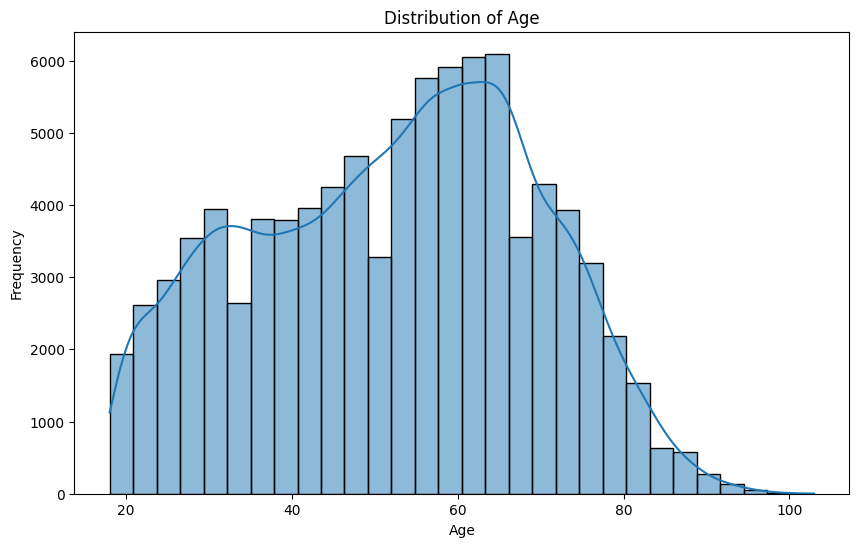

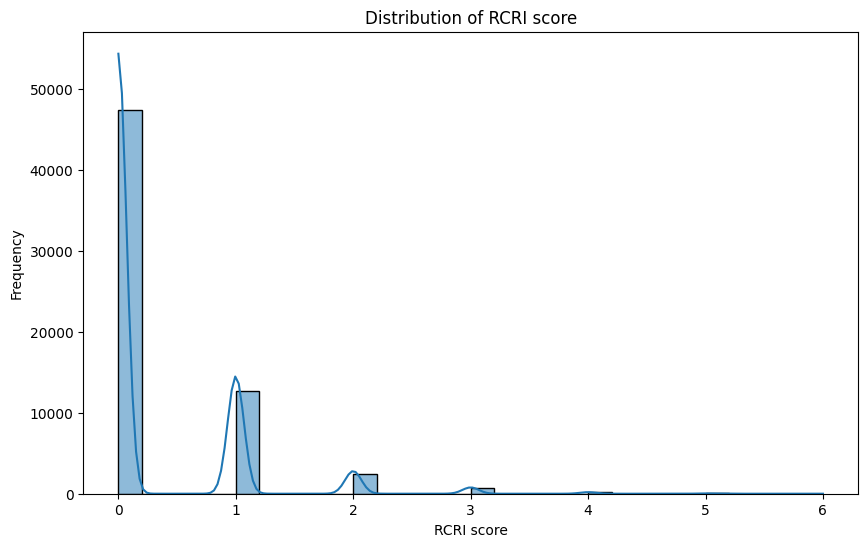

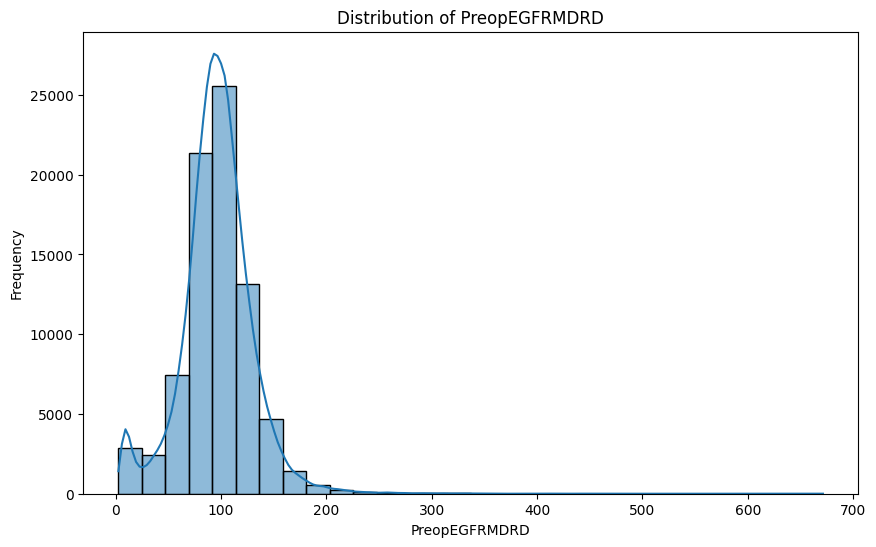

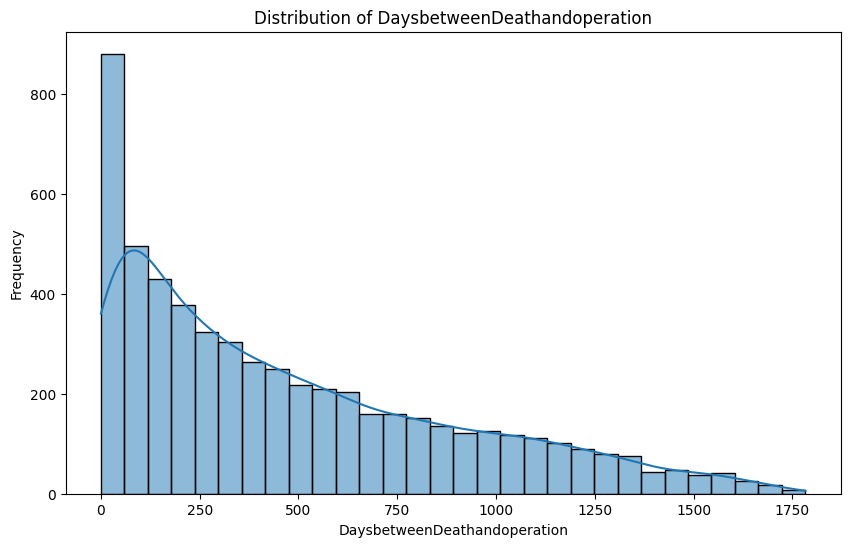

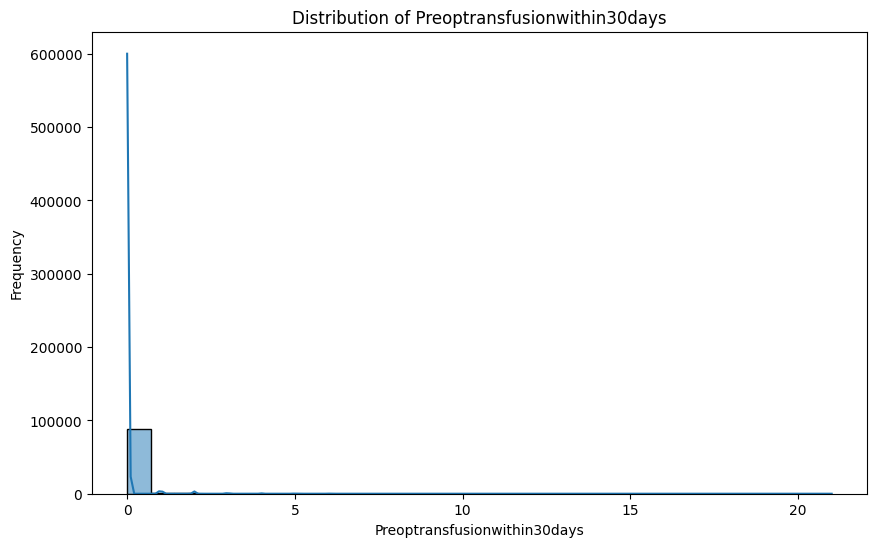

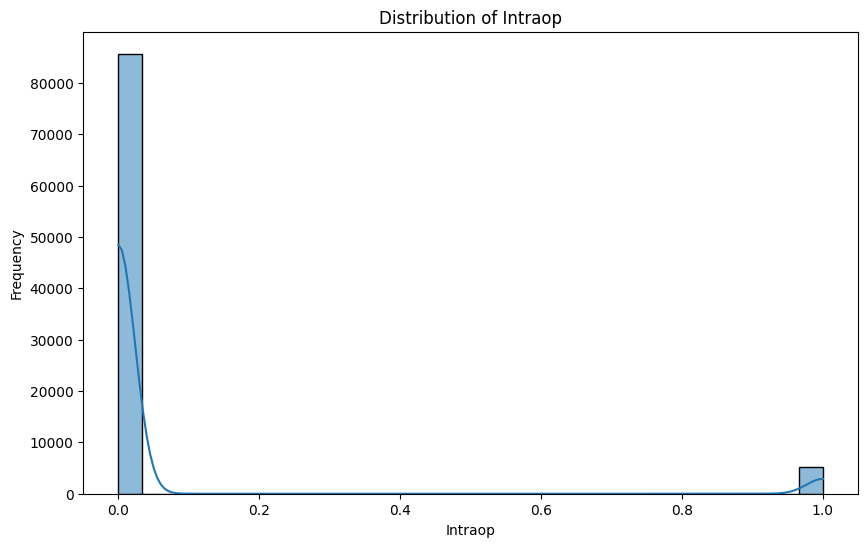

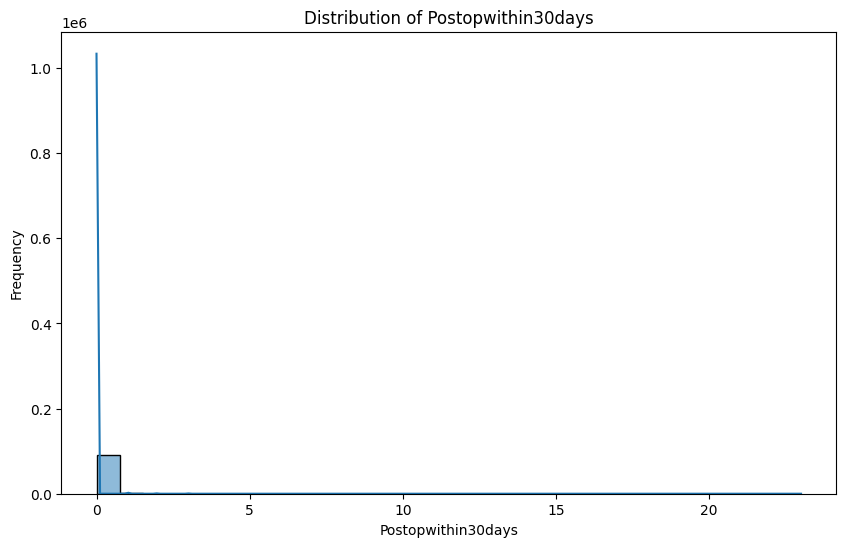

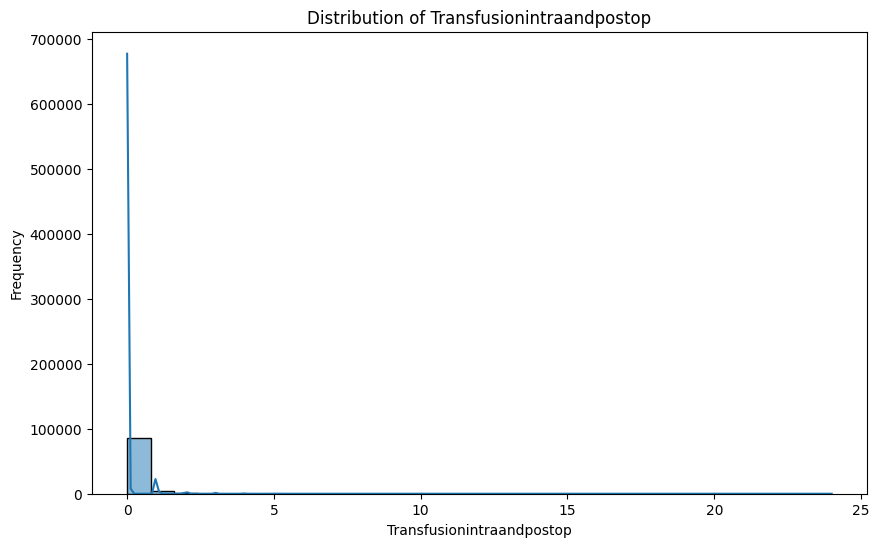

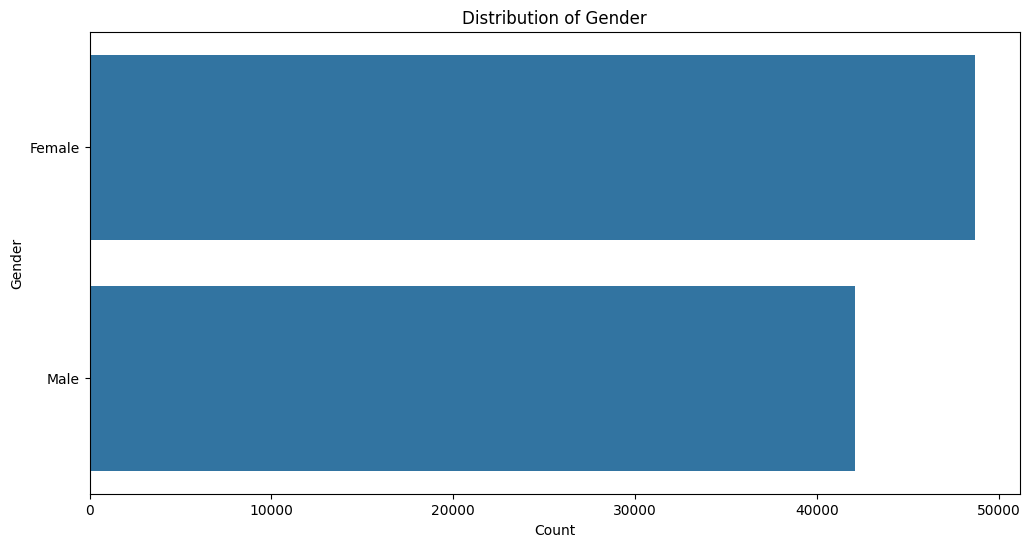

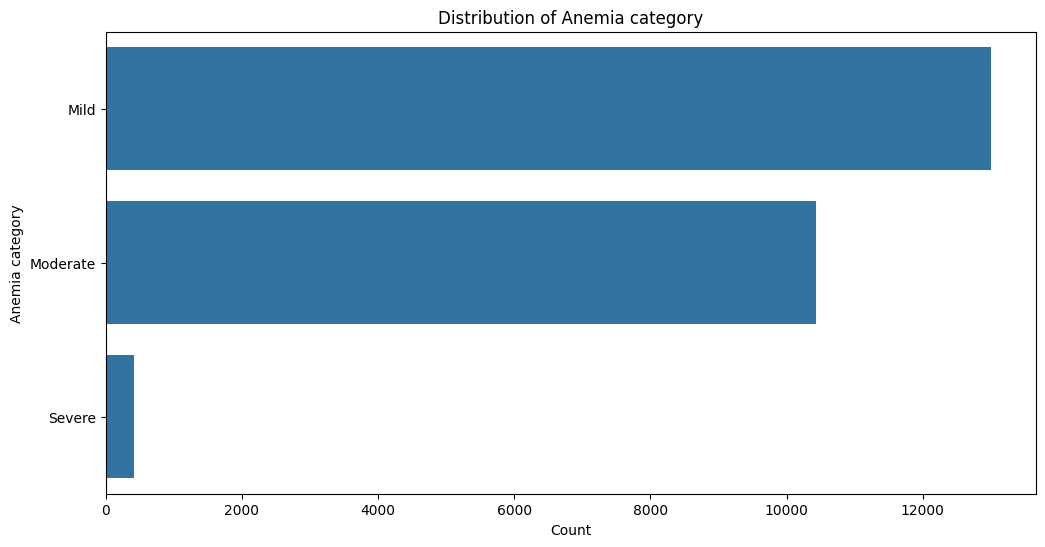

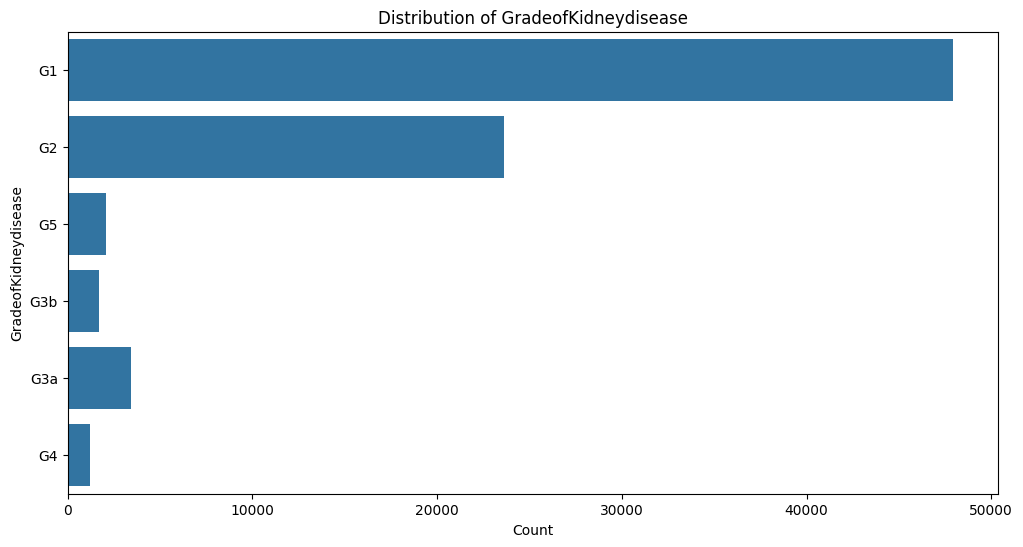

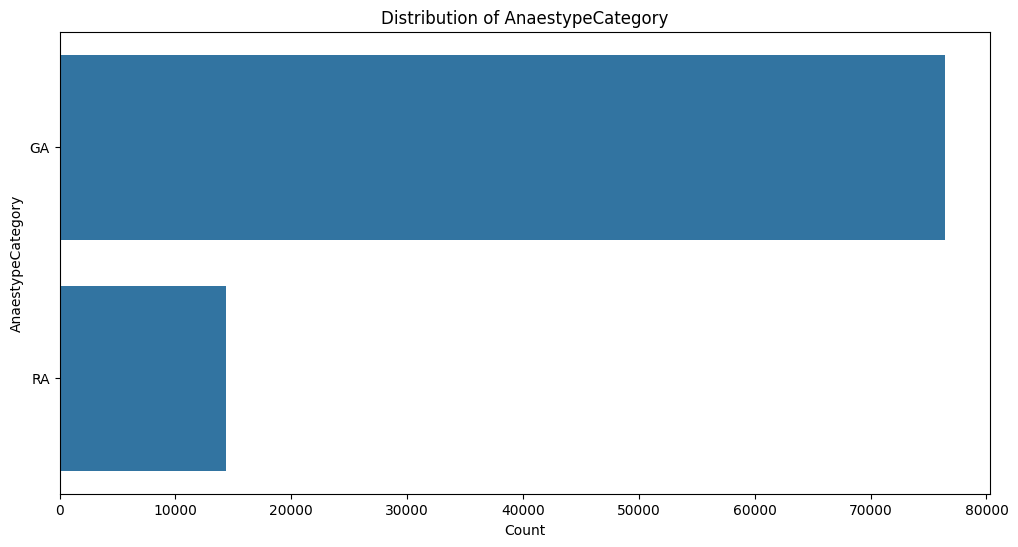

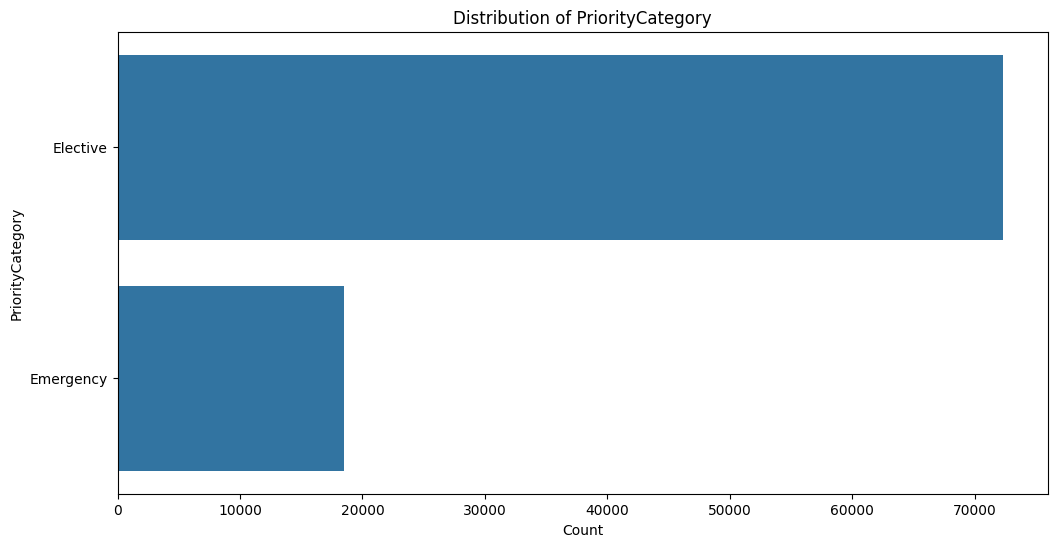

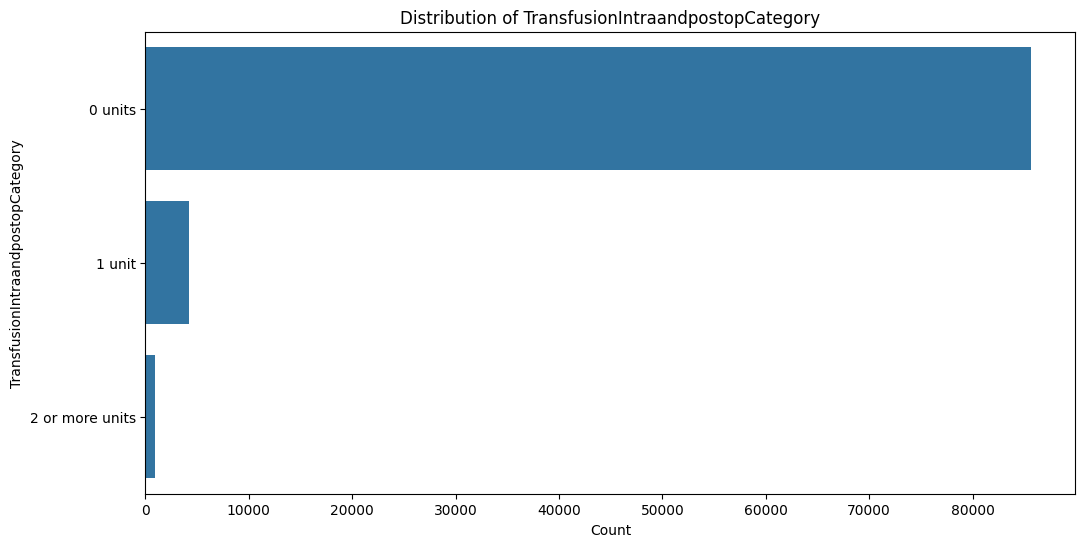

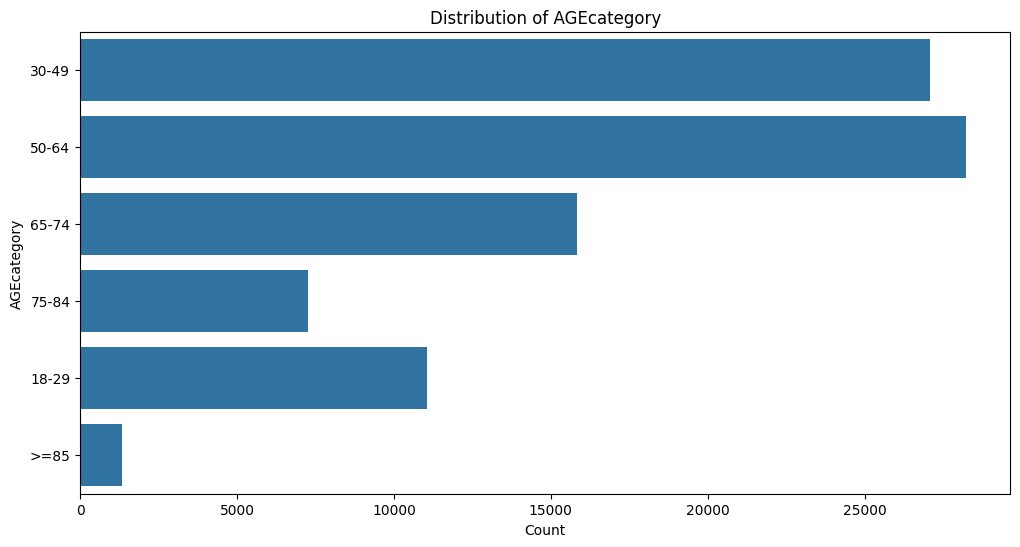

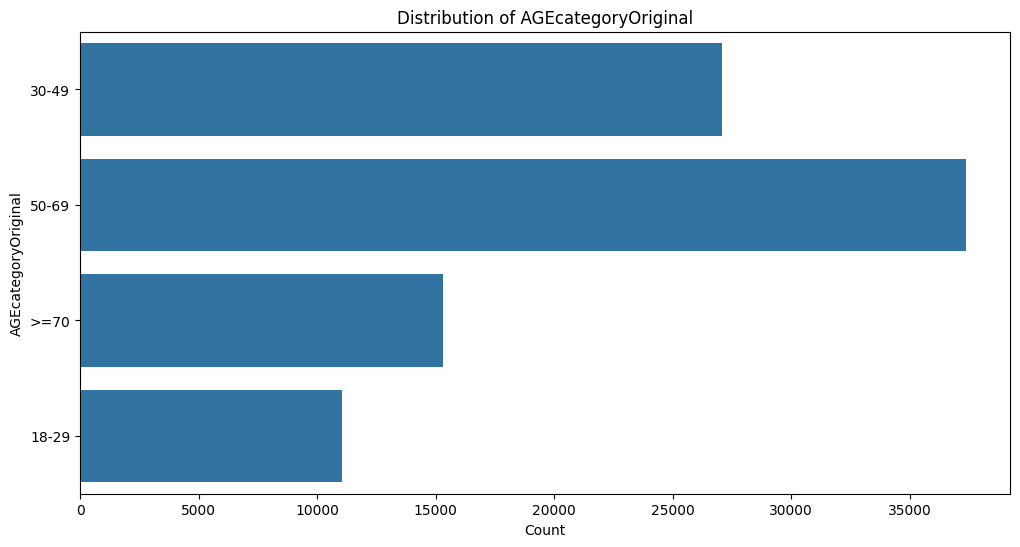

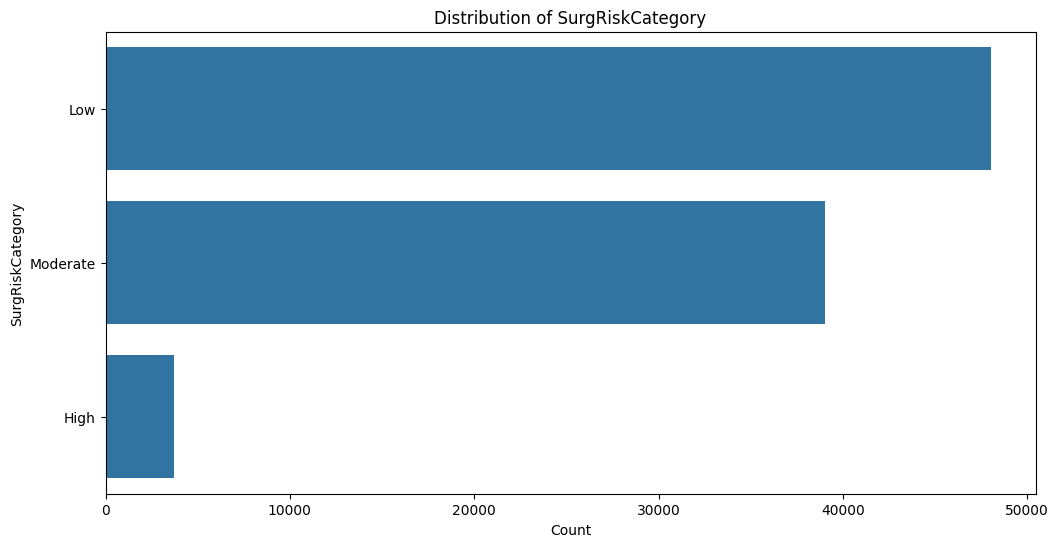

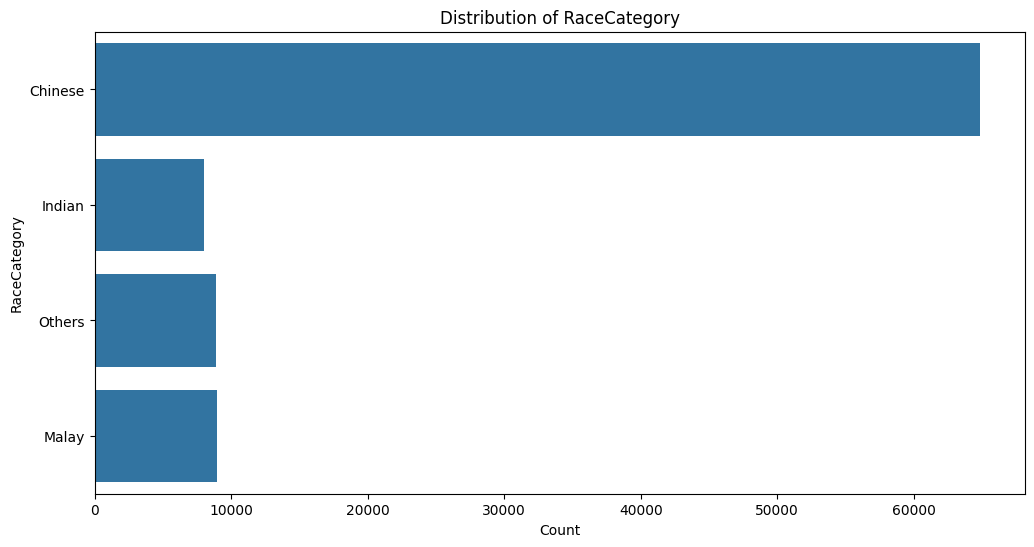

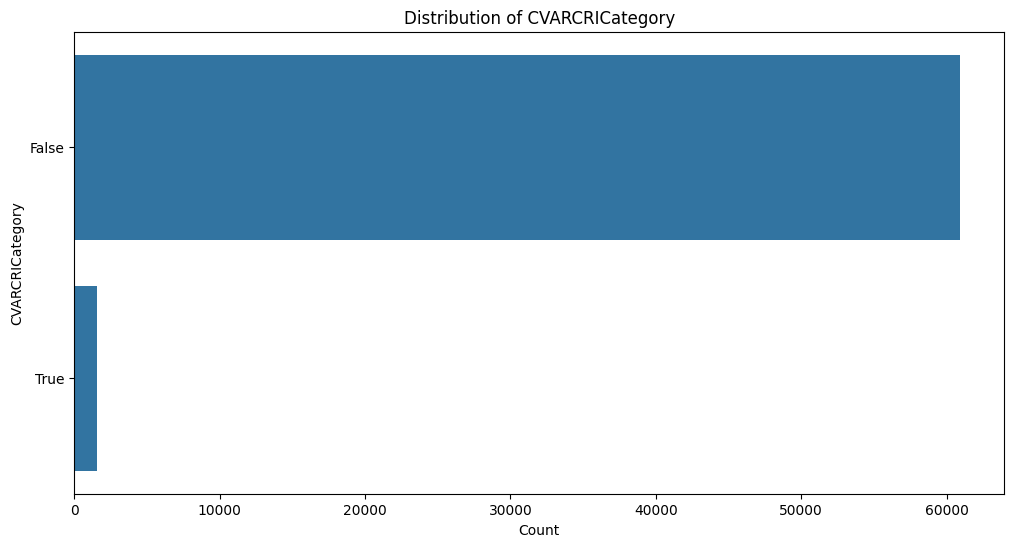

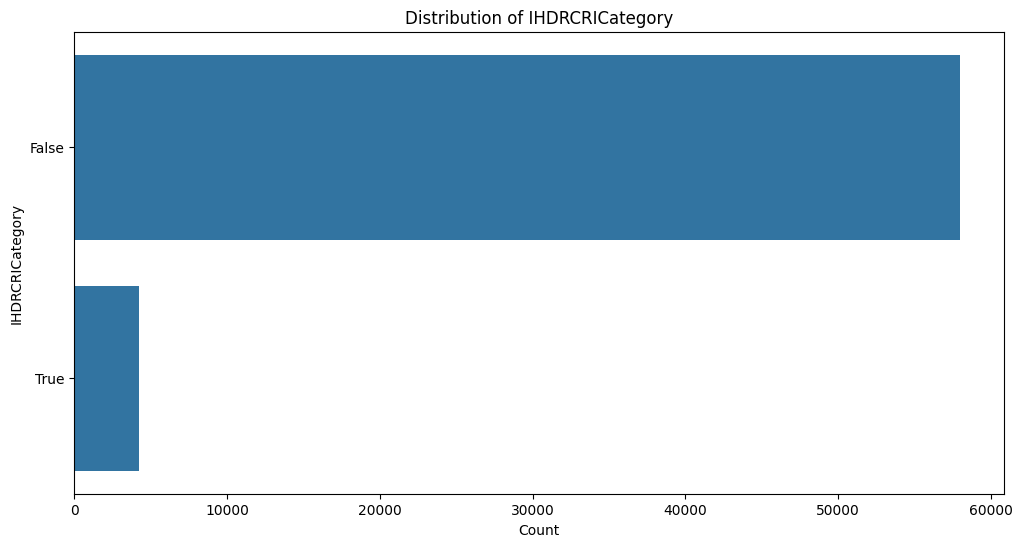

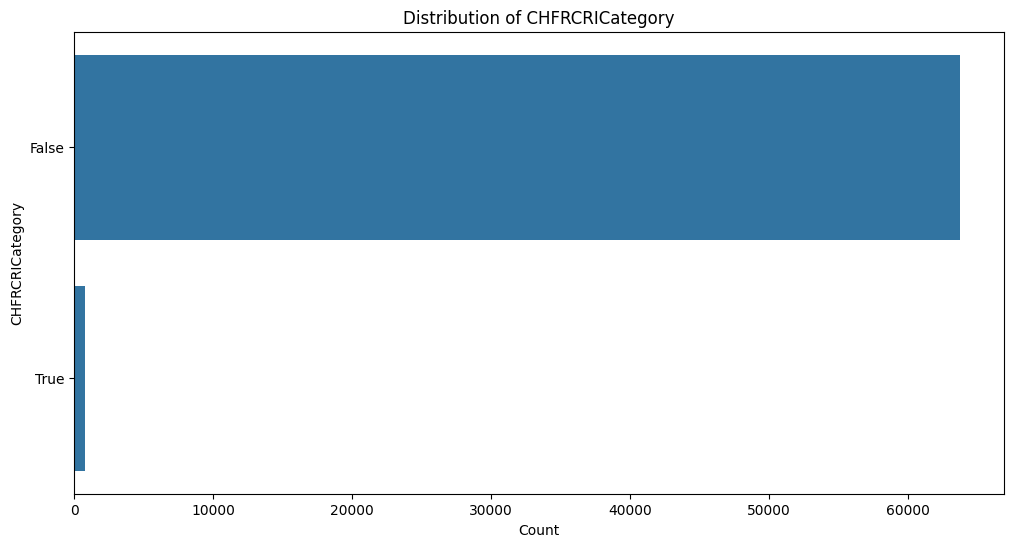

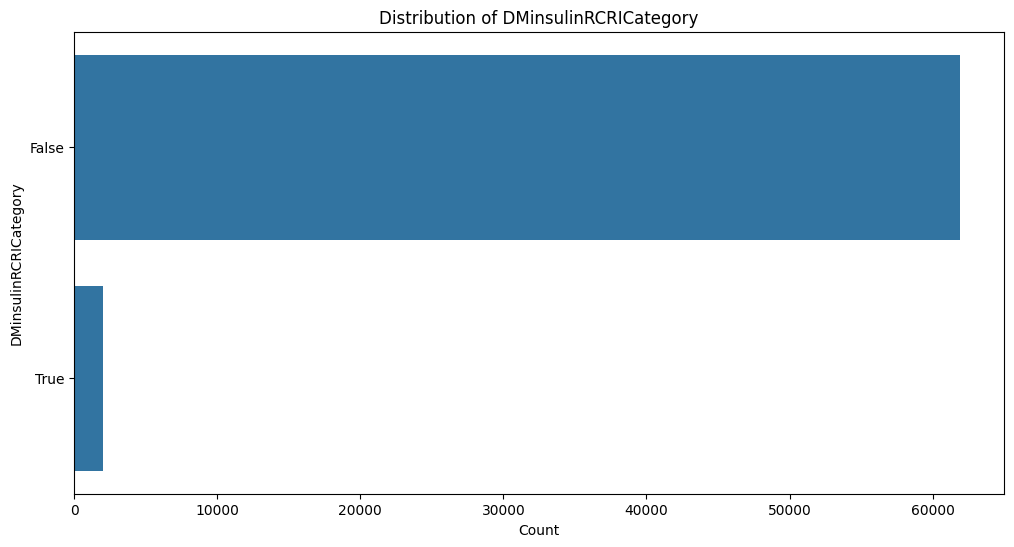

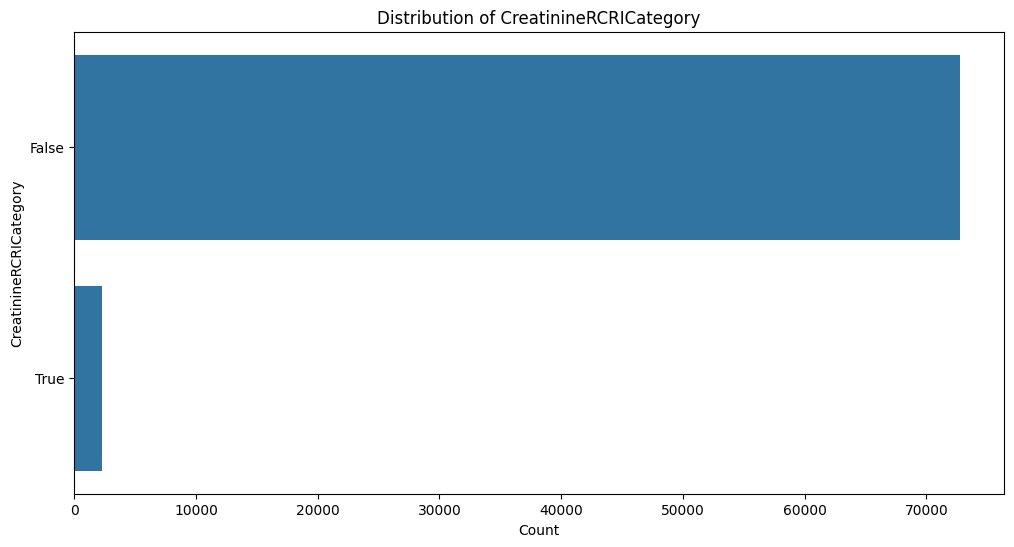

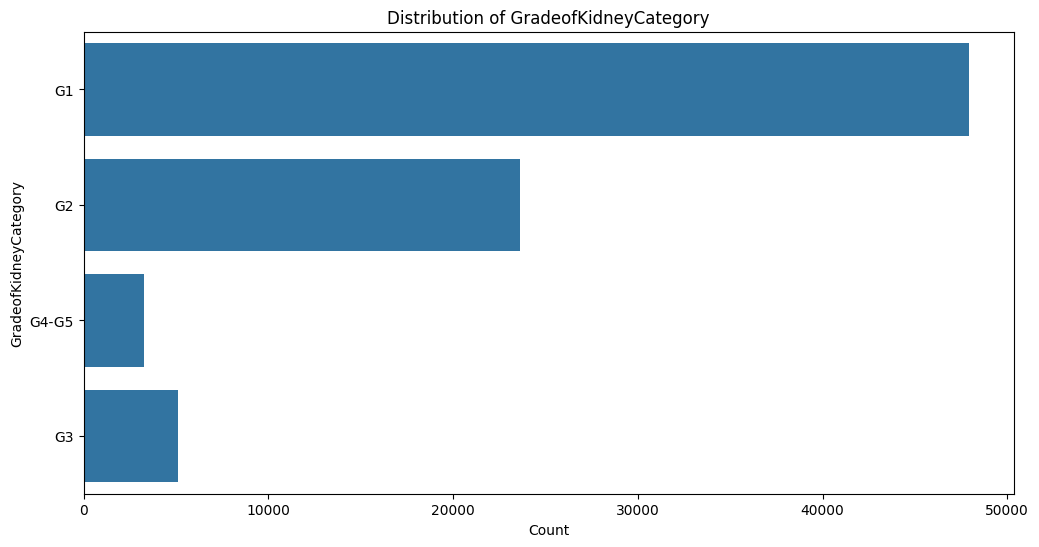

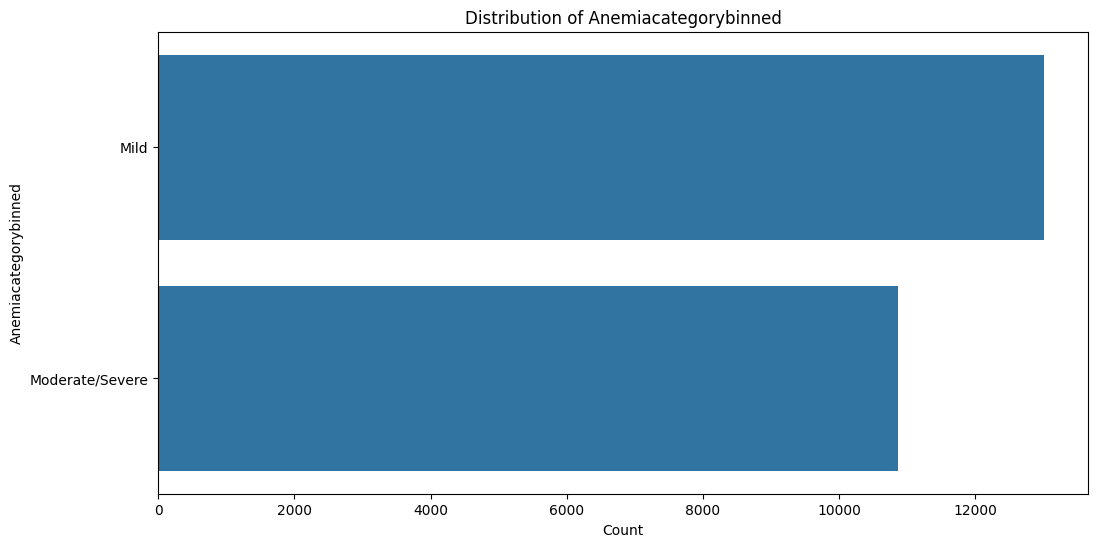

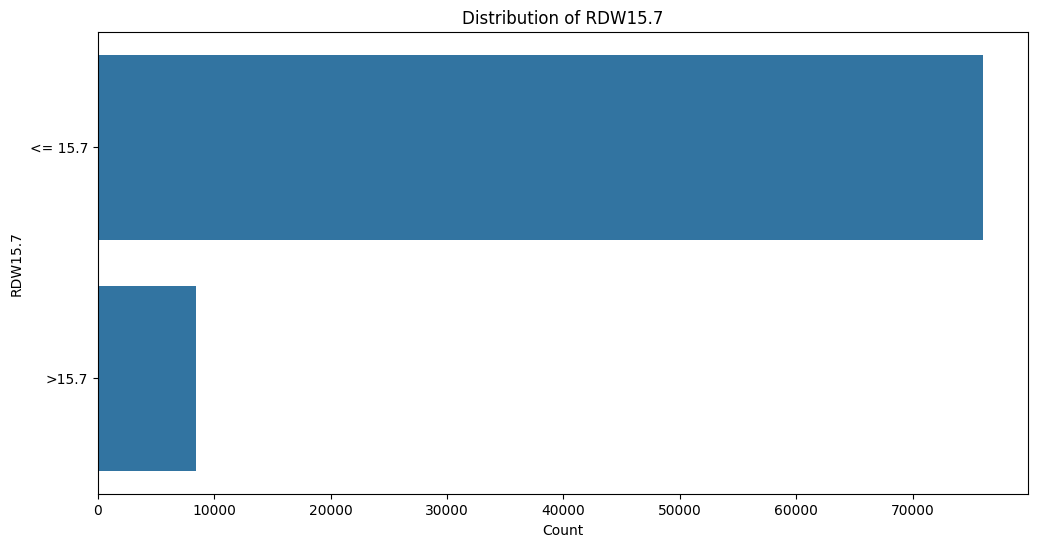

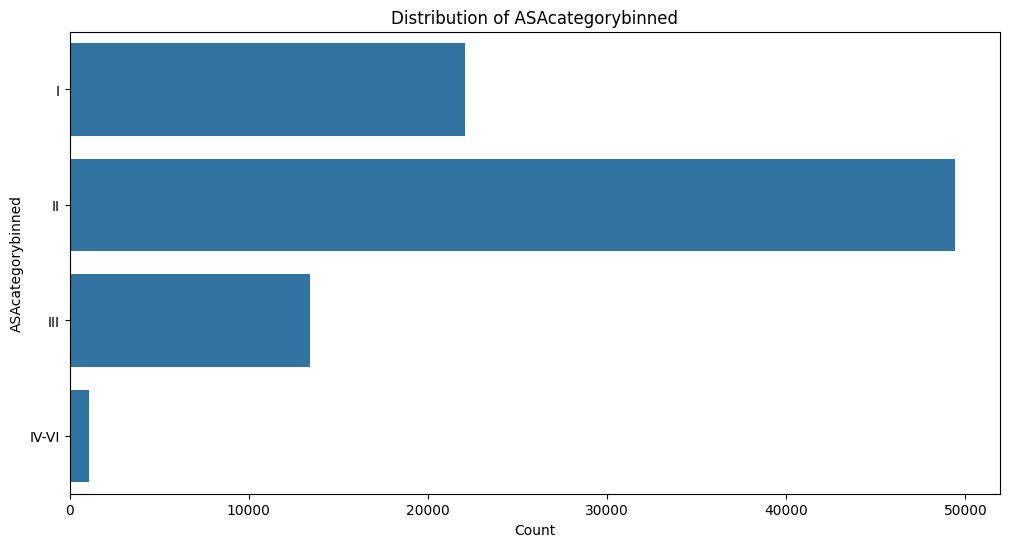

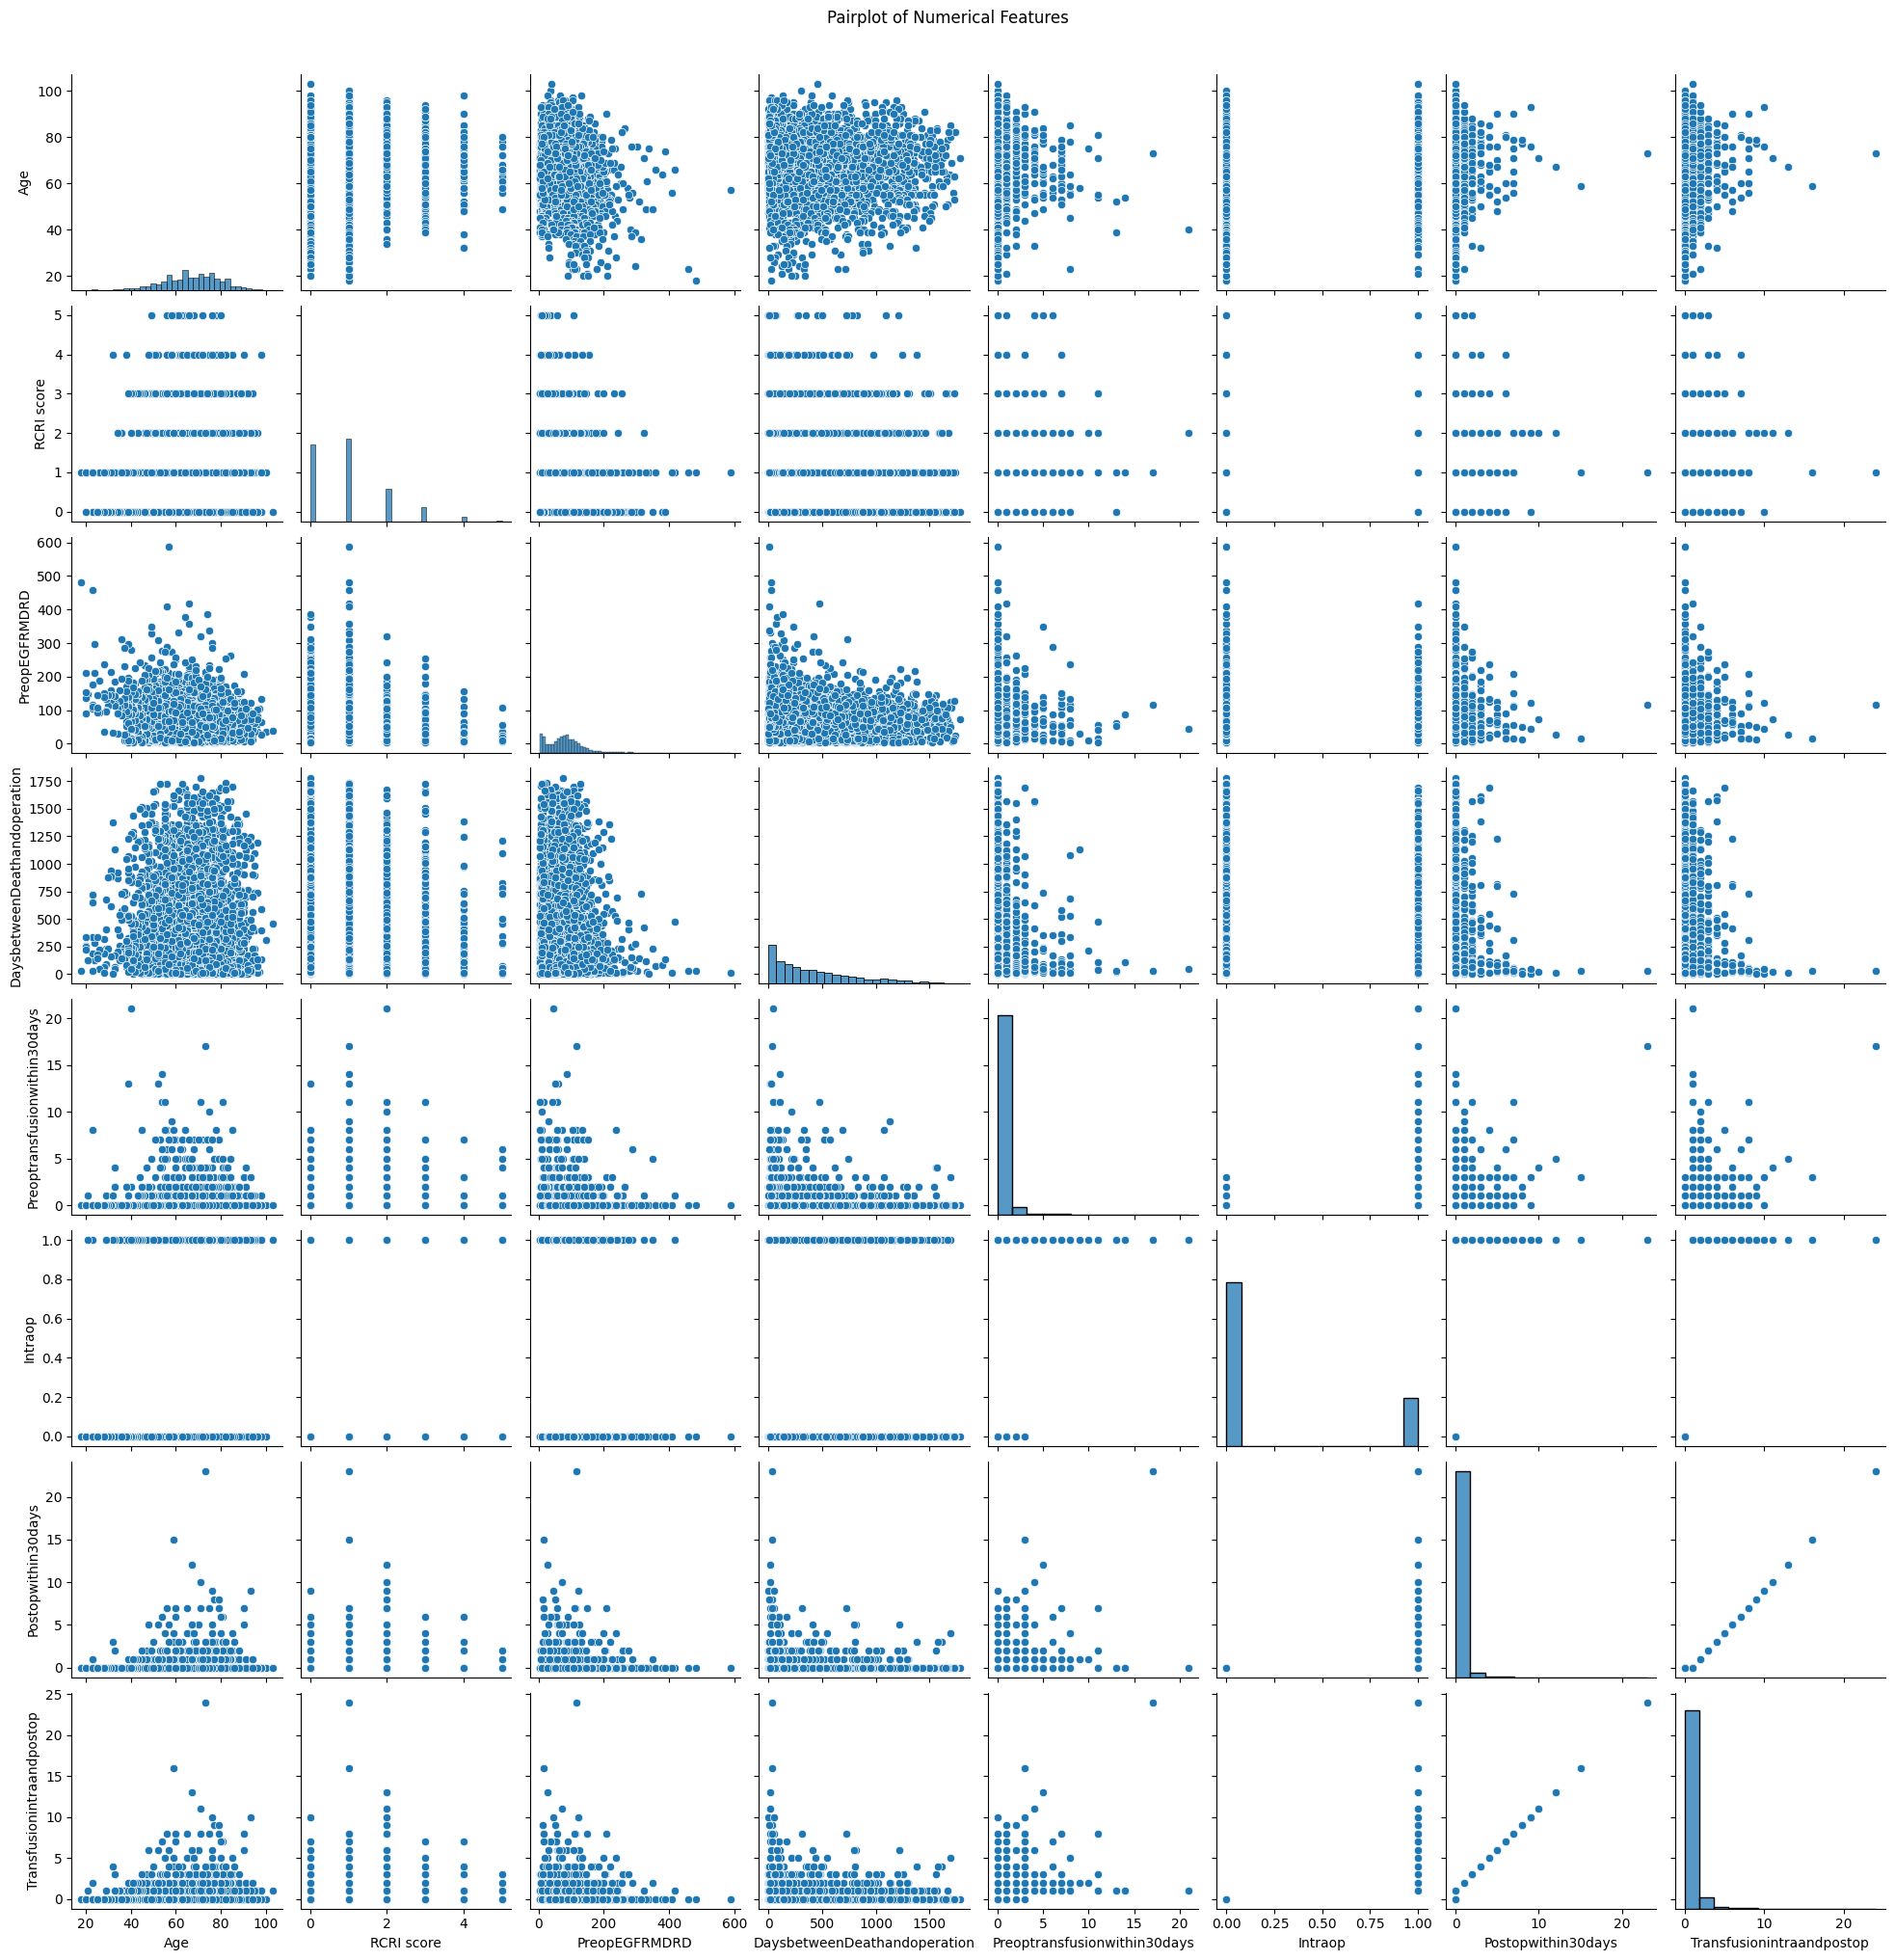

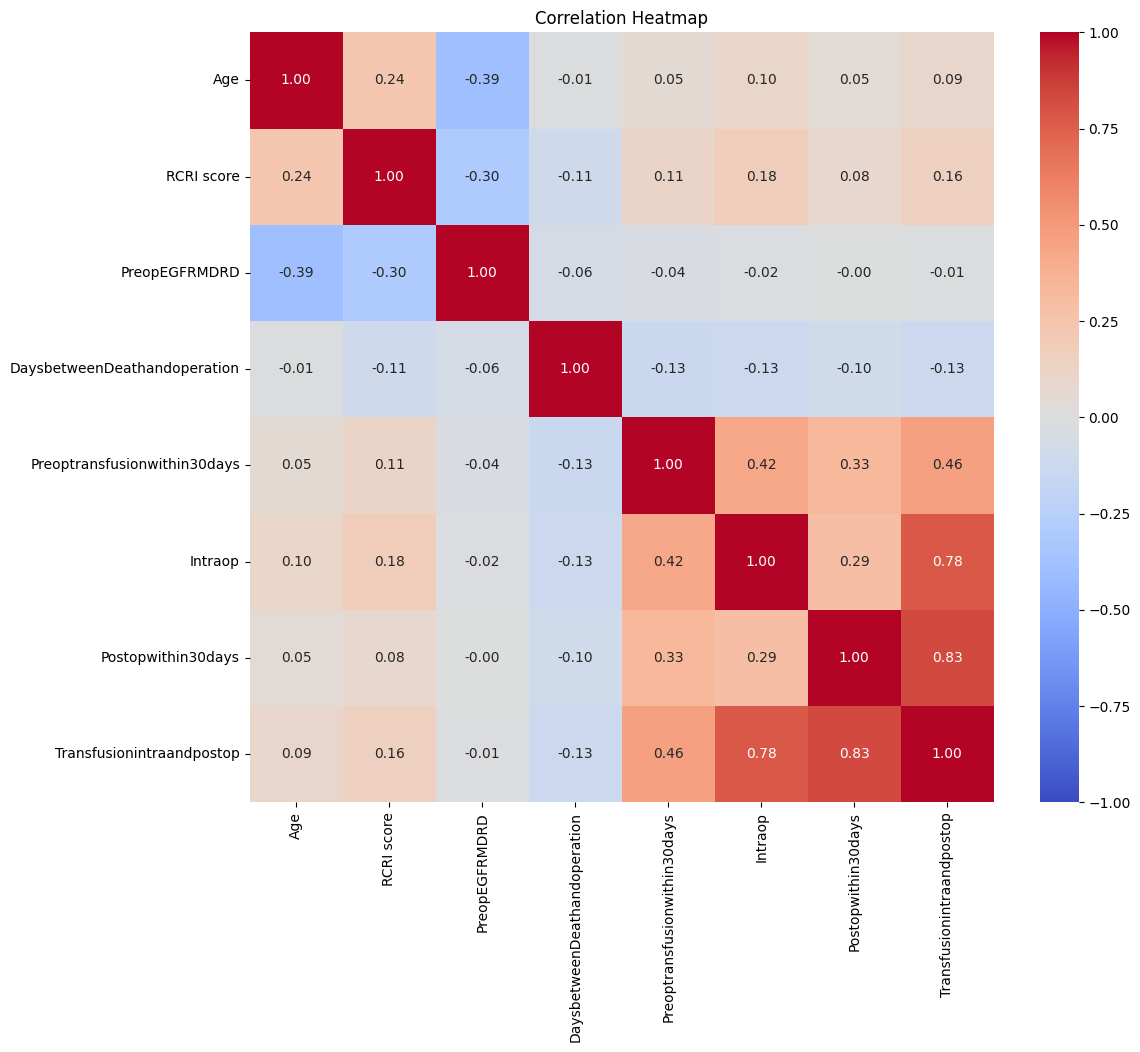

In [ ]:
# Summary of the dataset
print("Dataset Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical features
num_cols = df.select_dtypes(include=['float64']).columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Pairplot for numerical features
sns.pairplot(df[num_cols].dropna())
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()